# 实验75  数据分析与可视化综合实验

实验目的
1. 熟悉Python标准库csv的用法。
2. 熟悉ＣＳＶ和ＴＸＴ文件操作。
3. 熟悉安装扩展库numpy、pandas、matplotlib。
4. 熟悉使用扩展库pandas进行数据分析的基本操作。
5. 熟悉使用扩展库matplotlib进行数据可视化的基本操作。


实验内容
1. 运行下面的程序，在当前文件夹中生成饭店营业额模拟数据文件data.csv。


In [4]:
import csv
import random
import datetime
fn='data.csv'
with open(fn,'w') as fp:
    #创建csv文件并写入对象
    wr=csv.writer(fp,lineterminator='\n')
    #写入表头
    wr.writerow(['日期','销量'])
    #生成模拟数据
    startDate=datetime.date(2017,1,1)
    #生成365个模拟数据，可以根据需要进行调整
    for i in range(365):
        #生成一个模拟数据，写入csv文件
        amount=300+i*5+random.randrange(100)
        wr.writerow([str(startDate),amount])
        #下一天
        startDate=startDate+datetime.timedelta(days=1)

2. 然后完成下面的任务。
（1）使用pandas读取文件data.csv中的数据，创建DataFrame对象，并删除其中所有缺失值。
（2）使用matplotlib生成折线图，反映该饭店每天的营业额情况，并把图形保存为本地文件first.jpg。
（3）按月份进行统计，使用matplotlib绘制柱状图显示每个月份的营业额，并把图形保存为本地文件second.jpg。
（4）按月份进行统计，找出相邻两个月最大涨幅，并把涨幅最大的月份写入文件maxMonth.txt。
（5）按季度统计该饭店2017年的营业额数据，使用matplotlib生成饼状图显示2017年4个季度的营业额分布情况，并把图形保存为本地文件third.jpg。

<Figure size 432x288 with 0 Axes>

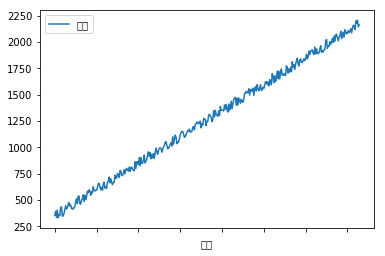

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
#读取数据，丢失缺失值
df=pd.read_csv('data.csv',encoding='cp936')
df=df.dropna()
#生成营业额折线图
plt.figure()
df.plot(x='日期')
plt.savefig('first.jpg')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

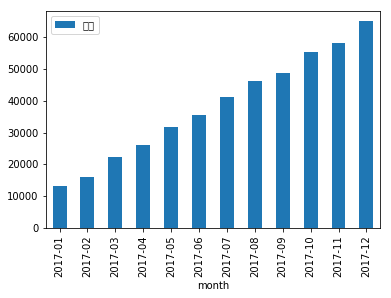

In [14]:
#按月统计，生成柱状图
plt.figure()
df1=df[:]
df1['month']=df1['日期'].map(lambda x: x[:x.rindex('-')])
df1=df1.groupby(by='month',as_index=False).sum()
df1.plot(x='month',kind='bar')
plt.savefig('second.jpg')

In [16]:
#查找涨幅最大的月份，写入文件
df2=df1.drop('month',axis=1).diff()
m=df2['销量'].nlargest(1).keys()[0]
with open('maxMonth.txt','w') as fp:
    fp.write(df1.loc[m,'month'])

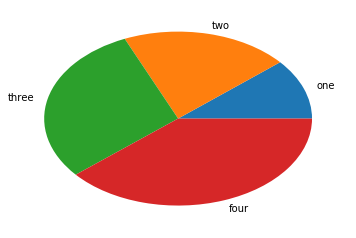

In [17]:
#按季度统计，生成饼状图
plt.figure()
one=df1[:3]['销量'].sum()
two=df1[3:6]['销量'].sum()
three=df1[6:9]['销量'].sum()
four=df1[9:12]['销量'].sum()
plt.pie([one,two,three,four],
       labels=['one','two','three','four'])
plt.savefig('third.jpg')